<a href="https://colab.research.google.com/github/akemiyamashita/similarity/blob/main/similarity_autopres_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import shutil
import os
import glob
import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import sys
sys.path.append('..')

In [4]:
dir_list =[i for i in glob.glob('/content/gdrive/*/*Xray') ]
print(dir_list)

['/content/gdrive/MyDrive/chestXray']


In [5]:
src_dir = '/content/gdrive/MyDrive/chestXray/39010102'

In [6]:
img_list = os.listdir(src_dir)
print(sorted(img_list))

['20060308', '20060308.jpg', '20060308crop.png', '20060703.jpg', '20060721.jpg', '20060816.jpg', '20070523.jpg', '20080611.jpg', '20090309.jpg', '20090520.jpg', '20100104.jpg', '20100331.jpg', '20101007.jpg', '20101018.jpg', '20101208.jpg', '20110126.jpg', '20110915.jpg', '20121227.jpg', '20130517.jpg', '20131102.jpg', '20131111.jpg', '20140620.jpg', '20150315.jpg', '20150427.jpg', '20150605.jpg', '20160711.jpg', '20170501.jpg', '20171022.jpg', '20180507.jpg', '20180723.jpg', '20181001.jpg', '20181006.jpg', '20181210.jpg', '20190218.jpg', '20190220.jpg', '20190222.jpg', '20190227.jpg', '20190301.jpg', '20190304.jpg', '20190307.jpg', '20190308.jpg', '20190309.jpg', '20190313.jpg', '20190318.jpg', '20190320.jpg', '20190320crop.png', '39010102_CR_20060308', '39010102_CR_20060308_001.jpg', '39010102_CR_20060703', '39010102_CR_20060703_001.jpg', '39010102_CR_20060721', '39010102_CR_20060721_001.jpg', '39010102_CR_20060816', '39010102_CR_20060816_001.jpg', '39010102_CR_20070523', '39010102_C

In [7]:
os.makedirs('/content/img', exist_ok=True)

In [8]:
for item in glob.glob('/content/gdrive/MyDrive/chestXray/39010102/*_001.jpg'):
  shutil.copy(item, '/content/img')

In [9]:
print(sorted(os.listdir('./img')))
img_num = len(os.listdir('./img'))

['39010102_CR_20060308_001.jpg', '39010102_CR_20060703_001.jpg', '39010102_CR_20060721_001.jpg', '39010102_CR_20060816_001.jpg', '39010102_CR_20070523_001.jpg', '39010102_CR_20080611_001.jpg', '39010102_CR_20090309_001.jpg', '39010102_CR_20090520_001.jpg', '39010102_CR_20100104_001.jpg', '39010102_CR_20100331_001.jpg', '39010102_CR_20101007_001.jpg', '39010102_CR_20101018_001.jpg', '39010102_CR_20101208_001.jpg', '39010102_CR_20110126_001.jpg', '39010102_CR_20110915_001.jpg', '39010102_CR_20121227_001.jpg', '39010102_CR_20130517_001.jpg', '39010102_CR_20131102_001.jpg', '39010102_CR_20131111_001.jpg', '39010102_CR_20140620_001.jpg', '39010102_CR_20150315_001.jpg', '39010102_CR_20150427_001.jpg', '39010102_CR_20150605_001.jpg', '39010102_CR_20160711_001.jpg', '39010102_CR_20170501_001.jpg', '39010102_CR_20171022_001.jpg', '39010102_CR_20180507_001.jpg', '39010102_CR_20180723_001.jpg', '39010102_CR_20181001_001.jpg', '39010102_CR_20181006_001.jpg', '39010102_CR_20181210_001.jpg', '390101

In [10]:
for i in range(16):
  os.makedirs('/content/' + str(i).zfill(2), exist_ok=True)

In [11]:
os.makedirs('./hansetsu_org', exist_ok=True)

0
255
119823


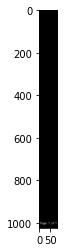

In [147]:
han = '39010102_CR_20060721_001.jpg'
img = Image.open(os.path.join('./img',han) )
left_side = img.crop((0,0,85,1024))
left_array = np.array(left_side)
print(np.min(left_array))
print(np.max(left_array))
print(np.sum(left_array))
left_img = plt.imshow(left_side)

In [12]:
#各ピクセル完全に黒（0、0、0）
def hansetsu_checker(dir_path):
  hansetsu = []
  for item in glob.glob( os.path.join(dir_path, '*.jpg') ):
    img = Image.open(item)
    left_side = img.crop((0,0,85,1024))
    left_array = np.array(left_side)
    if np.sum(left_array) == 119823:
      hansetsu.append(item)
  return hansetsu

In [13]:
hansetsu = hansetsu_checker('./img')

(844, 844)


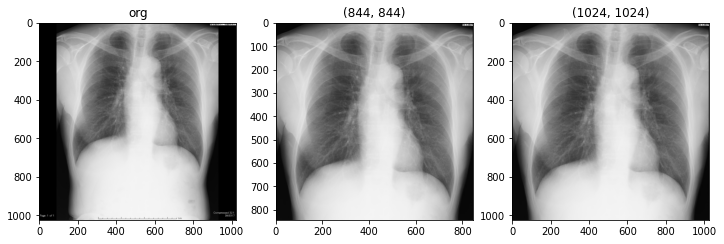

In [160]:
img = Image.open(hansetsu[0])
img_center_crop = img.crop((90,0,90+844,844))
img_expand = img_center_crop.resize((1024,1024), Image.BICUBIC)

fig = plt.figure(figsize = (12,12))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('org')
ax1.imshow(img)
ax2 = fig.add_subplot(1,3,2)
ax2.set_title(img_center_crop.size)
ax2.imshow(img_center_crop)
ax3 = fig.add_subplot(1,3,3)
ax3.set_title(img_expand.size)
ax3.imshow(img_expand)

In [14]:
def to_daikaku(img_path):
  for i,p in enumerate(img_path):
    img = Image.open(p)
    img_center_crop = img.crop((90,0,90+844,844))
    img_expand = img_center_crop.resize((1024,1024), Image.BICUBIC)
    name = os.path.basename(p)

    img_expand.save(os.path.join('.','img','resize'+name) )
    shutil.move(p, './hansetsu_org/')

In [15]:
to_daikaku(hansetsu)

In [188]:
resize_list = [ i for i in glob.glob('./img/resize*.jpg')]
print(len(resize_list))

2


(1024, 1024)


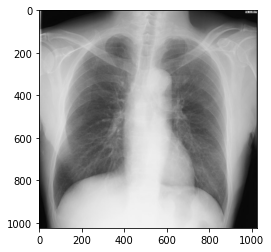

In [190]:
img = Image.open(resize_list[1])
print(img.size)
plt.imshow(img)

In [23]:
resize_list = [i for i in glob.glob('./img/resize*.jpg')]
test_path = './img/resize39010102_CR_20060721_001.jpg'
basename = os.path.basename(test_path)
resize_rename = basename.replace('resize','')
print(os.path.join( '.','img', resize_rename))
print(resize_list[0])

./img/39010102_CR_20060721_001.jpg
./img/resize39010102_CR_20060721_001.jpg


In [26]:
#rename resize images
for item in glob.glob('./img/resize*.jpg'):
  basename = os.path.basename(item)
  os.rename(item, os.path.join('.','img',basename.replace('resize','')))

In [27]:
print(sorted(os.listdir('./img')))

['39010102_CR_20060308_001.jpg', '39010102_CR_20060703_001.jpg', '39010102_CR_20060721_001.jpg', '39010102_CR_20060816_001.jpg', '39010102_CR_20070523_001.jpg', '39010102_CR_20080611_001.jpg', '39010102_CR_20090309_001.jpg', '39010102_CR_20090520_001.jpg', '39010102_CR_20100104_001.jpg', '39010102_CR_20100331_001.jpg', '39010102_CR_20101007_001.jpg', '39010102_CR_20101018_001.jpg', '39010102_CR_20101208_001.jpg', '39010102_CR_20110126_001.jpg', '39010102_CR_20110915_001.jpg', '39010102_CR_20121227_001.jpg', '39010102_CR_20130517_001.jpg', '39010102_CR_20131102_001.jpg', '39010102_CR_20131111_001.jpg', '39010102_CR_20140620_001.jpg', '39010102_CR_20150315_001.jpg', '39010102_CR_20150427_001.jpg', '39010102_CR_20150605_001.jpg', '39010102_CR_20160711_001.jpg', '39010102_CR_20170501_001.jpg', '39010102_CR_20171022_001.jpg', '39010102_CR_20180507_001.jpg', '39010102_CR_20180723_001.jpg', '39010102_CR_20181001_001.jpg', '39010102_CR_20181006_001.jpg', '39010102_CR_20181210_001.jpg', '390101

In [63]:
#a = (355.6 /1024)*100
#print('{:.8f}'.format(a))

34.72656250


In [16]:
def image_split(img_path):
  img = Image.open(img_path)
  f,e = os.path.splitext(img_path)
  img_array = np.array(img.convert('L'))
  split_img = []
  x = img_array.copy()
  x = x.reshape(4,256,4,256)
  x = x.transpose([0,2,1,3])
  x = x.reshape(-1, 256,256)
  for i in range(x.shape[0]):
    im = Image.fromarray(x[i])
    template=im.save(  'template_' +  str(i).zfill(2) + 'tem.jpg')
    shutil.copy( 'template_' +  str(i).zfill(2) + 'tem.jpg',    os.path.join('/content',str(i).zfill(2) ))
  return template
  

In [18]:
# first Xray photo is used as 16 templates
first_img = sorted(os.listdir('/content/img'))[0]
first_path = os.path.join('/content/img/', first_img)
print(first_path)
image_split(first_path)

/content/img/39010102_CR_20060308_001.jpg


In [19]:
x_pls = [128 +( 256*i) for i in range(4)]
print(x_pls)

[128, 384, 640, 896]


In [29]:
area_top = [256 * i for i in range(4)]
print(area_top)

[0, 256, 512, 768]


In [90]:
tem_num = 12
c_y = x_pls[tem_num//4]
c_x = x_pls[tem_num//4]
center_y,center_x = x_pls[tem_num//4],x_pls[tem_num%4]
area_y,area_x = area_top[tem_num//4],area_top[tem_num%4]

print(center_x,center_y)
print(area_x,area_y)

128 896
0 768


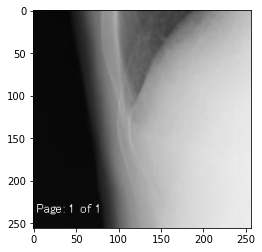

In [81]:
template_path = os.path.join('/content', 'template_'+tem_loc+ 'tem.jpg')
tem_test = Image.open(template_path)
plt.imshow(tem_test, cmap='gray')

In [84]:
img_test_path = os.path.join ('./','img', (os.listdir('./img')[5]))

img_test = cv2.imread( img_test_path )
template_test = cv2.imread(template_path)

method = eval('cv2.TM_CCOEFF_NORMED')
res = cv2.matchTemplate(img_test,template_test,method)


In [66]:
print(os.path.basename(img_test_path))

39010102_CR_20060721_001.jpg


In [95]:
tem_num = 12
template_path = os.path.join('/content', 'template_'+tem_loc+ 'tem.jpg')
template = cv2.imread(template_path,0)
template.shape[::-1]
print(template.shape)

(256, 256)


In [46]:
tem_num = 15

x_pls = [128 +( 256*i) for i in range(4)]
area_top = [256 * i for i in range(4)]

center_y,center_x = x_pls[tem_num//4],x_pls[tem_num%4]
area_y,area_x = area_top[tem_num//4],area_top[tem_num%4]
miss =0

for item in glob.glob('/content/img/*_001.jpg'):
    tem_loc = str(tem_num).zfill(2)
    template_path = os.path.join('/content', 'template_'+tem_loc+ 'tem.jpg')

    img = cv2.imread(item,0)
    img2 = img.copy()
    
    template = cv2.imread(template_path,0)
    w, h = template.shape[::-1]
    method = eval('cv2.TM_CCOEFF_NORMED')
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    detect = img2[top_left[1]:top_left[1]+h,top_left[0]:top_left[0]+w]
    detect_cor = img2[area_y:area_y+256, area_x:area_x+256]

#100pixel = 34.72656250mmずれていたらmiss
    if np.abs(top_left[0]-area_x)>=100 or np.abs(top_left[1]-area_y)>=100:
     miss += 1
     detect_img = detect_cor
    else:
      detect_img = detect 

    f = os.path.basename(item)
    
    cv2.imwrite( os.path.join('/content',str(tem_loc), 'ForUse_'+ str(tem_loc)+f ), detect_img)
    cv2.imwrite( os.path.join('/content',str(tem_loc), 'pred_'+ str(tem_loc)+f ), detect)
    cv2.imwrite( os.path.join('/content',str(tem_loc), 'pred_cor_'+ str(tem_loc)+f), detect_cor)

    precision = (miss / img_num )*100
    #print(f'precision : {precision}' )


In [194]:
print(miss)

1


In [209]:
precision =[9.30232558139535,2.3255813953488373,11.627906976744185,11.627906976744185,16.27906976744186,
            4.651162790697675,13.953488372093023,18.6046511627907,25.581395348837212,6.976744186046512,
            27.906976744186046,30.23255813953488,62.7906976744186,4.651162790697675,2.3255813953488373,
            27.906976744186046]

In [210]:
pres = np.array(precision)
print(np.argmax(pres), np.max(pres))
print('mean:', np.mean(pres))

12 62.7906976744186
mean: 17.296511627906977


In [100]:
prec_split_12 = 3/43
print(f'prec_split_12: {prec_split_12}')

prec_split_12: 0.06976744186046512


In [111]:
print(os.listdir('./12/')[:5])

[]


ValueError: ignored

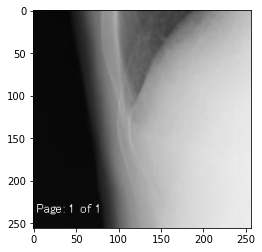

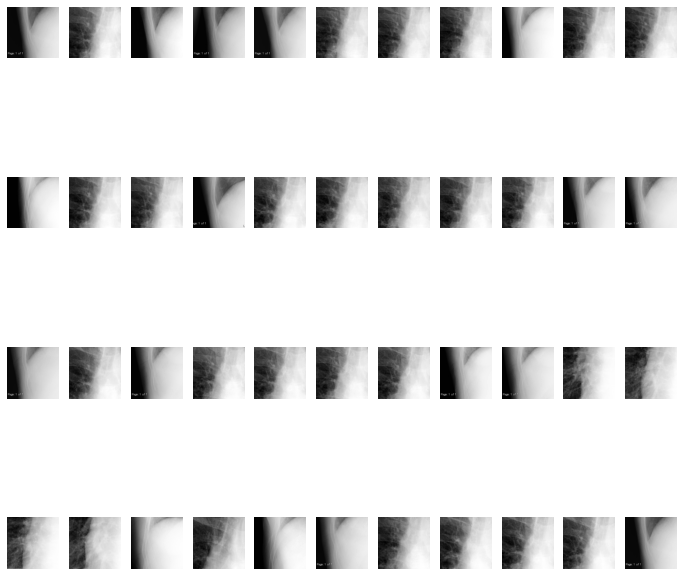

In [47]:
plt.imshow(Image.open('/content/template_12tem.jpg'),cmap='gray')
fig = plt.figure(figsize = (12,12))
for i,file in enumerate(sorted(glob.glob('/content/12/pred_*.jpg'))):
  img = Image.open(file)
  ax = fig.add_subplot(4,11,i+1)
  ax.imshow(img,cmap='gray')
  ax.axis('off')


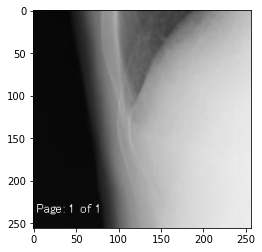

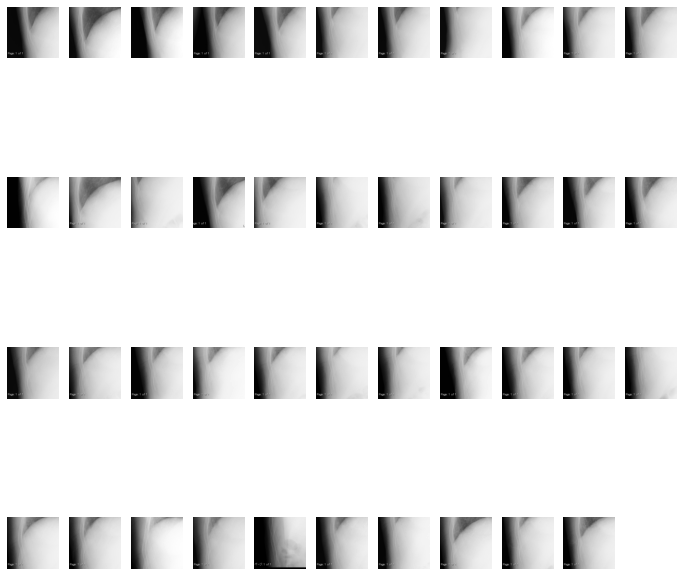

In [48]:
plt.imshow(Image.open('/content/template_12tem.jpg'),cmap='gray')
fig = plt.figure(figsize = (12,12))
for i,file in enumerate(sorted(glob.glob('/content/12/ForUse_*.jpg'))):
  img = Image.open(file)
  ax = fig.add_subplot(4,11,i+1)
  ax.imshow(img,cmap='gray')
  ax.axis('off')

[類似画像検索 - LBPヒストグラム](https://kakasi.hatenablog.com/entry/2020/01/11/172153)

相関法cv::HISTCMP_CORREL
カイ二乗法cv::HISTCMP_CHISQR
交差法cv::HISTCMP_INTERSECT
Bhattacharyya距離法cv::HISTCMP_BHATTACHARYYA

In [49]:
from skimage import feature

def lbp_hist(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = feature.local_binary_pattern(img, 8, 1)
    hist = cv2.calcHist([np.float32(lbp)], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, None, 0.0, 1.0, cv2.NORM_MINMAX)

    return hist

In [56]:
def normal_hist(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    hist = cv2.calcHist([np.float32(img)], [0], None, [256], [0, 256])
    hist = cv2.normalize(hist, None, 0.0, 1.0, cv2.NORM_MINMAX)

    return hist

In [70]:
#all images hist to detect the point of disease worsen.
METHOD = cv2.HISTCMP_CHISQR

ref_img = cv2.imread(first_path)
ref_hist = normal_hist(ref_img)

CHI=[]
for file in sorted(glob.glob("/content/img/*01.jpg")):    
    t_img = cv2.imread(file)
    t_hist = normal_hist(t_img)
    res = cv2.compareHist(ref_hist, t_hist, METHOD)
    CHI.append([file,res])

all_CHI = np.array(CHI)
print(all_CHI)

[['/content/img/39010102_CR_20060308_001.jpg' '0.0']
 ['/content/img/39010102_CR_20060703_001.jpg' '22.332893307529787']
 ['/content/img/39010102_CR_20060721_001.jpg' '36.61903503804061']
 ['/content/img/39010102_CR_20060816_001.jpg' '156.30790499631047']
 ['/content/img/39010102_CR_20070523_001.jpg' '9.632373366658086']
 ['/content/img/39010102_CR_20080611_001.jpg' '121.39110547220793']
 ['/content/img/39010102_CR_20090309_001.jpg' '3.255713106017735']
 ['/content/img/39010102_CR_20090520_001.jpg' '4.8313712777622895']
 ['/content/img/39010102_CR_20100104_001.jpg' '44.79320960831532']
 ['/content/img/39010102_CR_20100331_001.jpg' '36.527447415257754']
 ['/content/img/39010102_CR_20101007_001.jpg' '28.00864725819117']
 ['/content/img/39010102_CR_20101018_001.jpg' '71.70970211615975']
 ['/content/img/39010102_CR_20101208_001.jpg' '136.17139095446137']
 ['/content/img/39010102_CR_20110126_001.jpg' '234.59996724263988']
 ['/content/img/39010102_CR_20110915_001.jpg' '479.77429230248447']
 

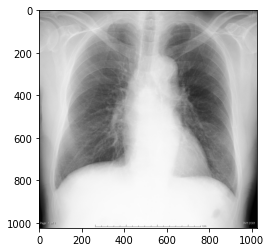

In [75]:
max_img = '/content/img/39010102_CR_20171022_001.jpg'
max=Image.open(max_img)
plt.imshow(max)

[Histogram Comparison](https://docs.opencv.org/3.4/d8/dc8/tutorial_histogram_comparison.html)

In [55]:
#compare to normal_hist and lbp_hist
ref_img = cv2.imread(first_path)
ref_img = cv2.cvtColor(ref_img, cv2.COLOR_BGR2GRAY)
ref_hist = cv2.calcHist([np.float32(ref_img)], [0], None, [256], [0, 256])
ref_hist = cv2.normalize(ref_hist, None, 0.0, 1.0, cv2.NORM_MINMAX)
lbp = feature.local_binary_pattern(ref_img, 8, 1)
lbp_hist = cv2.calcHist([np.float32(lbp)], [0], None, [256], [0, 256])
lbp_hist = cv2.normalize(lbp_hist, None, 0.0, 1.0, cv2.NORM_MINMAX)
res = cv2.compareHist(ref_hist,lbp_hist, cv2.HISTCMP_CHISQR)
print(res)

62.1384328466753


In [ ]:
METHOD = cv2.HISTCMP_CHISQR

CHI_15 = []
q_img = cv2.imread("/content/template_15tem.jpg")
q_hist = lbp_hist(q_img)

for file in sorted(glob.glob("/content/15/*pred.jpg")):    
    t_img = cv2.imread(file)
    t_hist = lbp_hist(t_img)
    res = cv2.compareHist(q_hist, t_hist, METHOD)
    CHI_15.append([file,res])
    print(file, "%f" %res)

In [ ]:
dir_num = '00'
test_img = Image.open( os.path.join('.',str(dir_num), 'template_'+ str(dir_num) +'tem.jpg')  )

In [ ]:
METHOD = cv2.HISTCMP_CHISQR
t_CHI=[]
CHI_d = {}

for i in range(16):
  dir_num = str(i).zfill(2)
  tem_img = cv2.imread( os.path.join('.',str(dir_num), 'template_'+ str(dir_num) +'tem.jpg'))
  tem_hist = lbp_hist(tem_img)
  for item in sorted(glob.glob( os.path.join('.',str(dir_num), '*pred.jpg') )):
    t_img = cv2.imread(item)
    t_hist = lbp_hist(t_img)
    res = cv2.compareHist(tem_hist, t_hist, METHOD)
    t_CHI.append(res)
  CHI = np.asarray(t_CHI)


In [ ]:
CHI.shape

(688,)

In [ ]:
688/16

43.0

In [ ]:
x = CHI.reshape(43,16)

In [ ]:
print(x)

[[6.48583504e-01 1.75215720e+00 2.47854052e+00 1.45153101e+00
  8.23334339e-01 2.25850291e+00 2.69351770e+00 2.39254258e+00
  2.76081667e+00 3.32945406e+00 2.44823990e+00 7.65804594e-01
  2.60264726e+00 2.76694144e+00 2.01186590e+00 3.52272304e+00]
 [3.92543863e+00 3.13567562e+00 1.77117676e+00 2.50700973e+00
  1.66370448e+00 7.55444931e+00 1.98836643e+00 3.14980280e+00
  4.31804031e+00 5.74778090e+00 4.74550812e+00 4.08217513e+00
  3.50309974e+00 8.88721318e+00 4.65055381e+00 4.52329798e+00]
 [5.31766610e+00 6.62618450e+00 6.10119019e+00 8.76241535e+00
  4.94440356e+00 5.16113210e+00 4.72352148e+00 8.15393117e+00
  5.07382806e+00 5.79461539e+00 4.40062311e+00 2.66849075e-01
  8.90735126e-01 1.66235363e+00 9.09173485e-01 1.09553001e+00]
 [1.33127827e+00 1.15531046e+00 1.81400110e+00 1.38914526e+00
  1.41717244e+00 1.62697101e+00 1.09760890e+00 1.59300091e+00
  2.15637262e+00 1.29785713e+00 1.36829148e+00 1.37670757e+00
  1.08559029e+00 7.25774276e-01 2.04994480e+00 1.42820651e+00]
 [2.

In [ ]:
df = pd.DataFrame(x)
df.columns=([chr(ord('A') + i) for i in range(16)])

In [ ]:
date_list = []
for item in glob.glob('./00/*pred.jpg'):
  f,e = os.path.splitext(item)
  a=f.replace('./00/39010102_CR_','')
  b=a.replace('_001_00_pred','')
  date_list.append(b)

In [ ]:
print(len(date_list))

43


In [ ]:
date = pd.DataFrame(date_list,columns=['date'])

In [ ]:
chi = pd.concat([date,df],axis=1)
print(chi)

        date          A          B  ...          N          O           P
0   20060816   0.648584   1.752157  ...   2.766941   2.011866    3.522723
1   20101007   3.925439   3.135676  ...   8.887213   4.650554    4.523298
2   20080611   5.317666   6.626185  ...   1.662354   0.909173    1.095530
3   20190304   1.331278   1.155310  ...   0.725774   2.049945    1.428207
4   20090309   2.735434   1.311516  ...   3.996149   5.596019    3.123836
5   20131111   1.692935   1.358464  ...   1.154728   1.108541    1.028815
6   20160711   1.069935   1.085842  ...   1.666314   1.906930    4.476101
7   20181001   2.140289   1.761923  ...   2.880974   2.255820    0.886940
8   20060721   0.791296   0.668093  ...   1.600904   0.767200    4.052602
9   20101018   2.222178   2.211223  ...   4.906863   8.071020    5.373564
10  20190309   4.520358   3.907120  ...   0.745353   5.321758    2.321976
11  20181210   1.123492   2.291059  ...   2.182867   0.991364    0.935398
12  20130517   1.201600   7.569450  ..

In [ ]:
chi.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4.605047,4.409463,3.349666,5.039460,7.876176,5.065657,4.285994,3.817049,5.065608,4.568044,3.958063,7.573114,2.714052,7.045909,6.025838,8.678385
std,12.520971,10.225714,8.714607,9.944839,19.914112,9.598917,9.415019,10.393457,16.042621,10.326715,10.697621,19.426766,6.704042,18.818774,15.282944,25.064720
min,0.146073,0.097548,0.116328,0.114179,0.191787,0.117690,0.134902,0.123311,0.089682,0.090290,0.081950,0.129736,0.090731,0.123638,0.096811,0.131768
25%,0.740591,0.832136,0.659063,0.867326,0.764907,0.709666,0.675662,0.806746,0.508555,0.667434,0.678044,0.667741,0.593147,0.734187,0.771989,0.769770
50%,1.564235,1.461113,1.768805,1.789314,2.108814,2.091007,1.154095,1.593001,1.426902,2.140422,1.585948,1.376708,1.173348,1.341223,1.382306,1.428207
75%,2.831331,2.901730,2.632730,3.477987,4.186894,4.441555,3.554735,2.771173,3.651346,3.249439,3.280926,3.283733,2.018359,3.091522,3.146510,4.392856
max,67.406098,64.286146,57.923170,59.445510,116.454353,55.716222,53.858799,67.381160,104.617611,65.305492,70.471671,87.375383,42.483923,96.653440,71.253493,146.049986


In [ ]:
chi.max()

date    20190320
A        67.4061
B        64.2861
C        57.9232
D        59.4455
E        116.454
F        55.7162
G        53.8588
H        67.3812
I        104.618
J        65.3055
K        70.4717
L        87.3754
M        42.4839
N        96.6534
O        71.2535
P         146.05
dtype: object

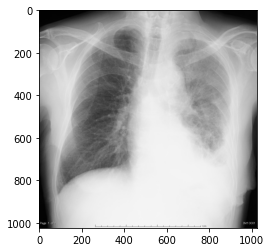

In [ ]:
max = Image.open('/content/img/39010102_CR_20190320_001.jpg')
plt.imshow(max, cmap='gray')

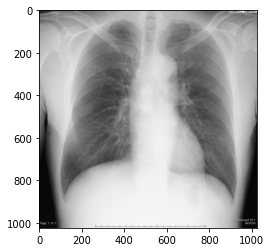

In [ ]:
ref = Image.open(first_path)
plt.imshow(ref, cmap='gray')

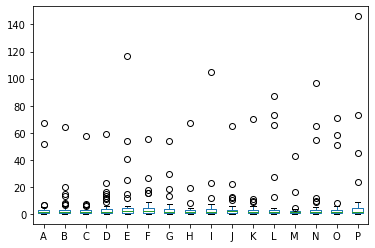

In [ ]:
chi.plot(kind='box')

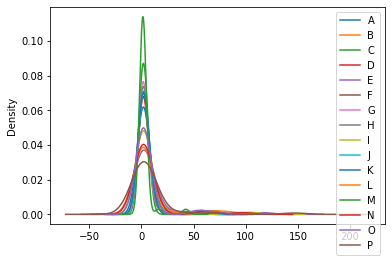

In [ ]:
df.plot(kind='density')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f007609d2d0>,
      dtype=object)

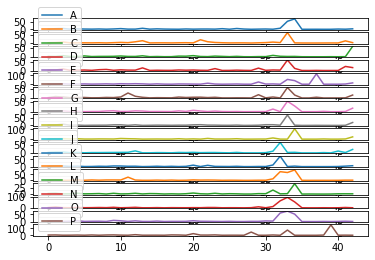

In [ ]:
df.plot(subplots=True, sharex=False)

In [ ]:
plt.imshow(Image.open('/content/template_15tem.jpg'),cmap='gray')
fig = plt.figure(figsize = (12,12))
for i,file in enumerate(glob.glob('/content/15/*_pred.jpg')):
  img = Image.open(file)
  ax = fig.add_subplot(4,11,i+1)
  ax.imshow(img,cmap='gray')
  ax.axis('off')

In [20]:
miss = np.array([2,0,4,1,4,0,5,7,11,0,3,8,26,1,1,11])
print('precision(%):', 100-(np.sum(miss / 688) * 100))
print(np.argmax(miss))

precision(%): 87.79069767441861
12


In [ ]:
print(df[df>40])

In [ ]:
from PIL import Image, ImageChops
import math

def rmsdiff(im1, im2):
    """Calculates the root mean square error (RSME) between two images"""
    errors = np.asarray(ImageChops.difference(im1, im2)) / 255
    return math.sqrt(np.mean(np.square(errors)))

In [ ]:
rms_test = Image.open('./img/39010102_CR_20101007_001.jpg')
first = Image.open(first_path)

In [ ]:
rmsdiff(rms_test,first)

0.15896892900942167

In [ ]:
rmsdiff(max,first)

0.17622372832540162

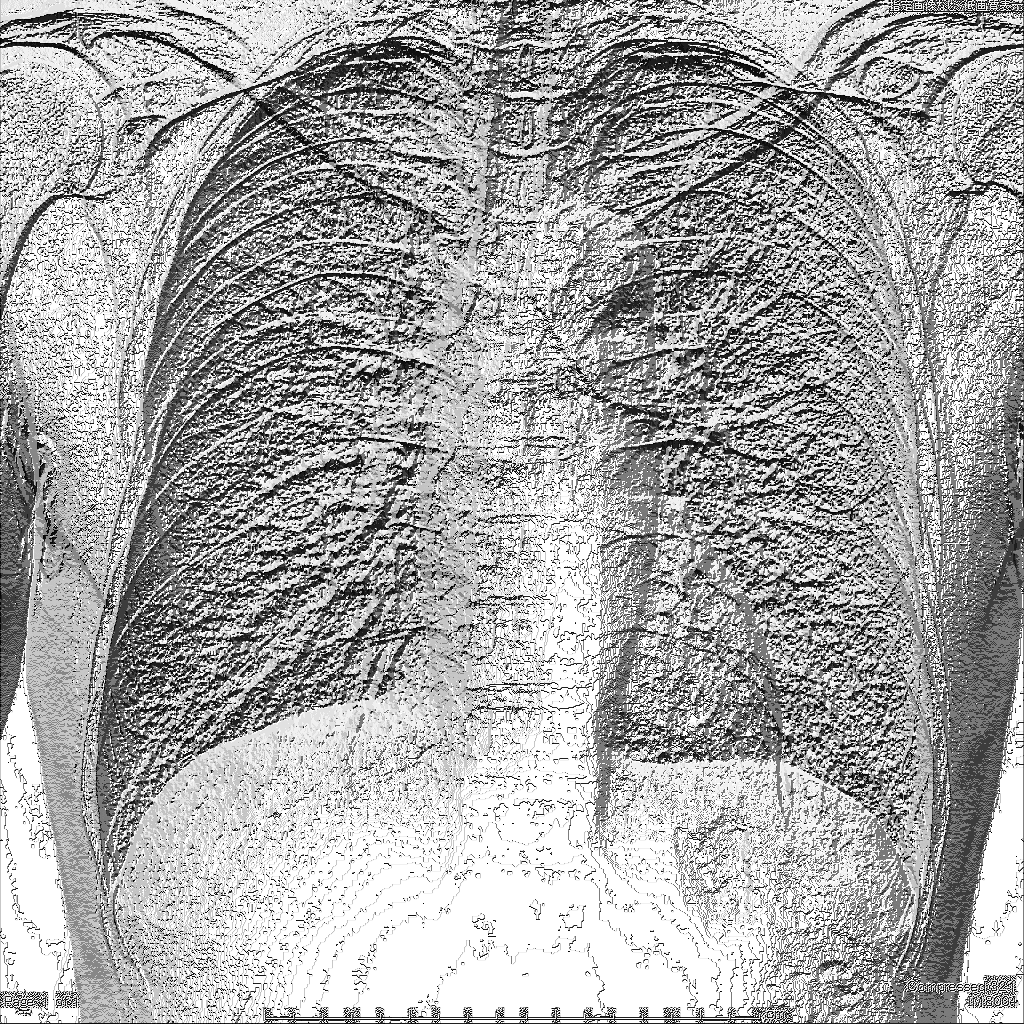

In [ ]:
img = cv2.imread(first_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
lbp = feature.local_binary_pattern(img, 8, 1)
cv2_imshow(lbp)